In [1]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt



# Erstellen Sie Ihre eigene Implementierung der PCA

In [40]:
class MyPCAeig:
    
    def __init__(self, dim):
        self.dim=dim
    
    def fit(self, X):
        M=np.cov(X)
        ew, ev = np.linalg.eig(M)
        ew_abs = np.abs(ew)
        A = np.zeros(shape=(self.dim, X.shape[0]))
        for i in range(self.dim):
            ew_max = np.argmax(ew_abs)
            ev_max = ev[ew_max]
            A[i]=ev_max
            ew_abs = np.delete(ew_abs, 0, ew_max)
            ew = np.delete(ew, 0, ew_max)
            ev=np.delete(ev, 0, ew_max)
        self.A = A
        
    def predict(self, X):
        return self.A.T * X

# Testen Sie diese mittels folgender Daten

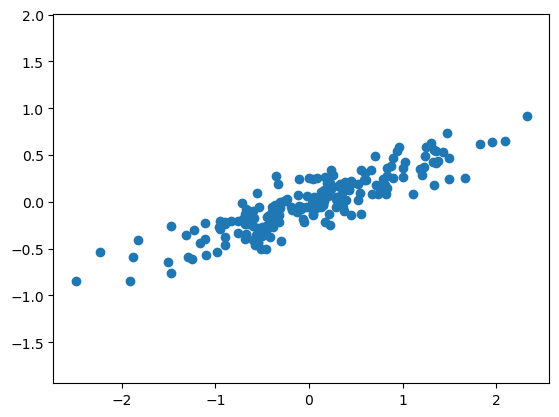

In [35]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

(31.89573937658575+0j)
(2.2041737672672318e-15+8.069078888940143e-16j)
[[-3.56407379e-02  7.87391191e-03]
 [-1.84331006e-02 -1.45745955e-02]
 [ 1.14844046e-02  9.92998804e-03]
 [-2.41128917e-02 -1.69166475e-02]
 [-4.99376864e-03 -1.58459067e-02]
 [-1.83026454e-02  7.35358963e-03]
 [-1.28467723e-02  9.23689441e-03]
 [-9.35455216e-03 -1.06091608e-02]
 [-2.68479414e-03  1.76791653e-03]
 [ 6.20818629e-02  3.70876112e-03]
 [-2.27165742e-02 -3.07604453e-03]
 [-3.21524162e-03 -7.93778222e-04]
 [-2.30737726e-03 -1.67291339e-03]
 [ 2.09246115e-04 -1.90122049e-03]
 [-2.78657223e-03 -4.90614050e-06]
 [ 5.02016148e-03  3.42627691e-06]
 [-2.34403146e-02  6.11394090e-03]
 [-7.63645651e-03  5.61730737e-04]
 [ 6.90139968e-03 -8.58792963e-03]
 [ 8.20947599e-03 -2.67314171e-03]
 [-2.84320764e-02 -4.58283735e-03]
 [-5.46998896e-03 -3.22128748e-04]
 [-8.01471344e-03 -7.05946235e-03]
 [-1.46733570e-02 -1.98245326e-03]
 [ 4.40814968e-03  4.41819252e-04]
 [ 1.46285745e-02  7.92825019e-04]
 [ 1.68981490e-02  

C:\Users\ABleicher\AppData\Local\Temp\ipykernel_24756\1911150128.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  A[i]=ev_max


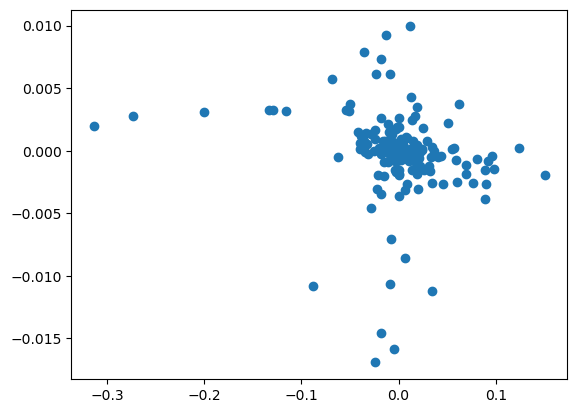

In [41]:
myPCAeig = MyPCAeig(2)
myPCAeig.fit(X)
Z = myPCAeig.predict(X)
print(Z)
plt.scatter(Z[:, 0], Z[:, 1])

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

print("Eigenwerte:")
print(pca.explained_variance_)
print("")
print("Eigenvektoren:")
print(pca.components_)

def draw_vector(v0, v1):
    ax = plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

Eigenwerte:
[0.7625315 0.0184779]

Eigenvektoren:
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


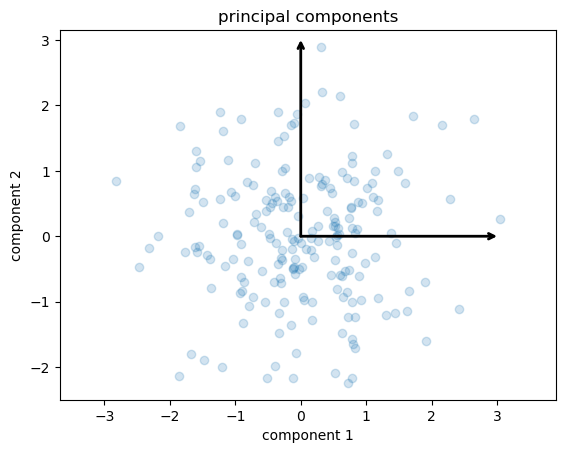

In [39]:

X_pca = pca.transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)


draw_vector([0, 0], [0, 3])
draw_vector([0, 0], [3, 0])
plt.axis('equal')
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.title("principal components")
plt.xlim=(-5, 5)
plt.ylim=(-3, 3.1)


plt.show()

# Verwenden Sie nun die PCA aus sklearn und transformieren die 4d-Daten des Iris datensatzes in 2D.

## PCA in sklearn
from sklearn.decomposition import PCA


## Iris data importieren
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(y.shape)


## Plotten Sie die ersten beiden PCA-komponenten


In [25]:
from sklearn.decomposition import PCA

from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(y.shape)


(150,)


In [26]:
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

print("Eigenwerte:")
print(pca.explained_variance_)
print("")
print("Eigenvektoren:")
print(pca.components_)

Eigenwerte:
[4.22824171 0.24267075]

Eigenvektoren:
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


In [27]:
def draw_vector(v0, v1):
    ax = plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

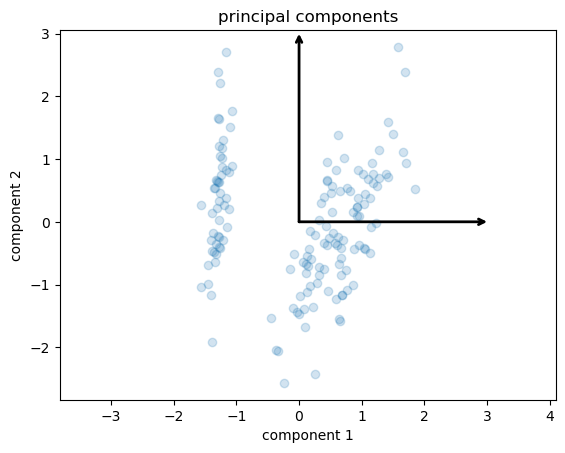

In [29]:
X_pca = pca.transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)


draw_vector([0, 0], [0, 3])
draw_vector([0, 0], [3, 0])
plt.axis('equal')
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.title("principal components")
plt.xlim=(-5, 5)
plt.ylim=(-3, 3.1)


plt.show()